#### 공공자전거
- 서울시 공공자전거 이용정보(시간대별)
- 서울시 공공자전거 대여소 정보
- 서울시 공공자전거 대여소별 이용정보

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 한글설정
# plt.rcParams["font.family"] = "Malgun Gothic"
# - 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter(action="ignore")

In [153]:
# 대여소 정보.xlsx

bike_df1 = pd.read_excel("./resources/대여소 정보.xlsx", skiprows=4, sheet_name="대여소현황")
bike_df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


In [154]:
# 시간대별.csv

bike_df2 = pd.read_csv("./resources/이용정보(시간대별).csv", encoding="cp949")
bike_df2.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [155]:
# 대여소별 이용정보.csv

bike_df3 = pd.read_csv("./resources/대여소별 이용정보(월별).csv", encoding="cp949")
bike_df3.head()

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202407,1597,1609
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698
3,양천구,732. 신월중학교,202407,865,865
4,양천구,733. 신정이펜하우스314동,202407,587,401


In [156]:
# bike_df1 columns
# ["대여소 번호","대여소 명","자치구","상세주소","위도","경도","설치시기","거치대수lcd","거치대수qr","운영방식"]

bike_df1.columns = ["대여소번호","대여소명","자치구","상세주소","위도","경도","설치시기","거치대수lcd","거치대수qr","운영방식"]

In [157]:
bike_df1.head(2)

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR


#### 데이터 탐색
    - info()
    - describe()
    - shape

In [158]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   대여소번호    2766 non-null   int64         
 1   대여소명     2766 non-null   object        
 2   자치구      2766 non-null   object        
 3   상세주소     2766 non-null   object        
 4   위도       2766 non-null   float64       
 5   경도       2766 non-null   float64       
 6   설치시기     2766 non-null   datetime64[ns]
 7   거치대수lcd  1419 non-null   float64       
 8   거치대수qr   1688 non-null   float64       
 9   운영방식     2766 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 216.2+ KB


In [159]:
bike_df1.describe()

,대여소번호,위도,경도,설치시기,거치대수lcd,거치대수qr
count,2766.000000,2766.000000,2766.000000,2766,1419.000000,1688.000000
mean,2425.175343,37.547727,126.991775,2019-05-13 04:51:17.845985024,12.651163,11.908175
min,102.000000,37.430977,126.798599,2015-01-07 00:00:00,5.000000,2.000000
25%,1032.250000,37.505643,126.914110,2017-06-22 10:33:06,10.000000,9.750000
50%,2132.500000,37.545483,127.005554,2018-12-14 00:00:00,10.000000,10.000000
75%,3904.750000,37.577515,127.064451,2021-01-05 00:00:00,15.000000,15.000000
max,6178.000000,37.691013,127.180756,2024-11-22 00:00:00,46.000000,62.000000
std,1612.065152,0.052404,0.092856,NaN,4.979105,6.049233


In [160]:
bike_df1.shape

(2766, 10)

In [161]:
bike_df2.shape
bike_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


In [162]:
bike_df3.shape

(13670, 5)

#### 데이터 전처리
- 컬럼명 변경
- 필요없는 컬럼 제거
- 데이터 타입 변경

In [163]:
# 컬럼제거 : 상세주소, 위도, 경로

bike_df1.drop(columns=["상세주소", "위도", "경도"],inplace=True)

In [164]:
# bike_df1 NaN 처리
# 동일한 값으로 채우기 : fillna()

# isna() or isnull()

# 컬럼별 NaN 개수 확인
bike_df1.isnull().sum()

대여소번호         0
대여소명          0
자치구           0
설치시기          0
거치대수lcd    1347
거치대수qr     1078
운영방식          0
dtype: int64

In [165]:
# bike_df1["거치대수lcd"] = bike_df1["거치대수lcd"].fillna(0)

bike_df1["거치대수lcd"].fillna(0,inplace=True)
bike_df1["거치대수qr"].fillna(0,inplace=True)

In [166]:
bike_df1.isnull().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
거치대수lcd    0
거치대수qr     0
운영방식       0
dtype: int64

In [167]:
bike_df1["대여소번호"].dtype

dtype('int64')

In [168]:
# df 전체 데이터 타입 조회

bike_df1.dtypes

대여소번호               int64
대여소명               object
자치구                object
설치시기       datetime64[ns]
거치대수lcd           float64
거치대수qr            float64
운영방식               object
dtype: object

In [169]:
# 타입변환 - astype(), pd.to_numeric()

bike_df1["대여소번호"] = bike_df1["대여소번호"].astype(object)

In [170]:
bike_df1["대여소번호"].dtype

dtype('O')

In [171]:
"1442. 중랑구청 중화동 별관 앞".split(".")

['1442', ' 중랑구청 중화동 별관 앞']

In [172]:
bike_df2["대여소명"].str.split(".",expand=True)

,0,1,2
0,1442,중랑구청 중화동 별관 앞,None
1,2728,마곡나루역 3번 출구,None
2,1023,한국종합기술사옥 앞,None
3,1150,송정역 1번출구,None
4,1260,방이동 한양3차아파트 옆,None
...,...,...,...
2126128,2547,반포래미안 리오센트,None
2126129,3680,강동역3번출구,None
2126130,240,문래역 4번출구 앞,None
2126131,5773,송파시그니처롯데캐슬,None


In [173]:
# 대여소명 : 숫자와 문자 분리 1442. 중랑구청 중화동 별관 앞

# bike_df2["대여소명"].dtype

bike_df2["대여소번호"] = bike_df2["대여소명"].str.split(".",expand=True)[0]
bike_df2["대여소명_new"] = bike_df2["대여소명"].str.split(".",expand=True)[1]

In [174]:
# 대여소명_new 값이 None 경우 확인

bike_df2[bike_df2["대여소명_new"] == None]
bike_df2[bike_df2["대여소명_new"].isnull()]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new


In [175]:
bike_df3.head()

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202407,1597,1609
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698
3,양천구,732. 신월중학교,202407,865,865
4,양천구,733. 신정이펜하우스314동,202407,587,401


In [176]:
# 대여소명 분리(대여소번호, 대여소명_new)
bike_df3["대여소번호"] = bike_df3["대여소명"].str.split(".",expand=True)[0]
bike_df3["대여소명_new"] = bike_df3["대여소명"].str.split(".",expand=True)[1]

In [177]:
# bike_df3[bike_df3["대여소명_new"] == None]
bike_df3[bike_df3["대여소명_new"].isnull()]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
6675,성동구,AS센터,202409,3,2,AS센터,None
9409,성동구,AS센터,202410,3,2,AS센터,None


In [178]:
# bike_df3 null 행 제거

bike_df3.dropna(subset="대여소명_new",inplace=True)

In [179]:
bike_df3[bike_df3["대여소명_new"].isnull()]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new


In [180]:
# 성별 : NaN, F', 'M', 'f', 'm'

# 성별안의 값들은 어떻게 구성되었는가?

bike_df2["성별"].unique()
bike_df2["성별"].value_counts()

성별
M    1050807
F     523055
m        232
f        174
Name: count, dtype: int64

In [181]:
# m => M, f => F

bike_df2.loc[(bike_df2["성별"] == "m"),"성별"] = "M"
bike_df2.loc[(bike_df2["성별"] == "f"),"성별"] = "F"

In [182]:
bike_df2["성별"].unique()

array([nan, 'F', 'M'], dtype=object)

In [183]:
# nan 개수 세기

bike_df2["성별"].isnull().sum()

np.int64(551865)

In [184]:
bike_df2["성별"].value_counts()

성별
M    1051039
F     523229
Name: count, dtype: int64

In [185]:
bike_df2.dtypes

대여일자         object
대여시간          int64
대여소번호        object
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량          object
탄소량          object
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [186]:
# 운동량, 탄소량 데이터 타입 변환 float64

# ValueError: could not convert string to float: '\\N'
# bike_df2["탄소량"].astype("float64")

# ValueError: Unable to parse string "\N" 
# pd.to_numeric(bike_df2["탄소량"])

In [187]:
# \N 을 -1 로 변경

bike_df2.loc[(bike_df2["운동량"] == r"\N"),"운동량"] = -1
bike_df2.loc[(bike_df2["탄소량"] == r"\N"),"탄소량"] = -1

In [188]:
bike_df2["탄소량"] = bike_df2["탄소량"].astype("float64")
bike_df2["운동량"] = bike_df2["운동량"].astype("float64")

In [189]:
bike_df2.dtypes

대여일자         object
대여시간          int64
대여소번호        object
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량         float64
탄소량         float64
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [190]:
# 대여일자(object) => datetime

bike_df2["대여일자"] = pd.to_datetime(bike_df2["대여일자"])

In [191]:
print(bike_df2["대여일자"].dtype)

datetime64[ns]


#### 데이터 분석
- 이동거리/평균 사용시간이 높은 대여소는?
- 운동량과 이동거리의 상관관계는?
- 따릉이를 가장 많이 사용하는 성별은?
- 서울시 구별 설치 거치대 개수는?
- 서울시 구별 거치대 개수와 대여건수?

In [192]:
bike_df2.head(3)

# 이동거리(M) 평균값(mean)이 가장 큰 순서대로 대여소(대여소명_new) 추출 (대여소명_new, 이동거리(M))

bike_df2.groupby("대여소명_new")["이동거리(M)"].mean().reset_index().sort_values("이동거리(M)",ascending=False)


,대여소명_new,이동거리(M)
631,동작역 5번출구 동작주차공원,9878.046280
6,"500번,507번 버스 종점 앞",7032.394895
1467,압구정나들목,6714.258646
2211,흑석역 1번출구,6447.478955
1852,정곡나들목,6233.488745
...,...,...
2007,총신대 앞(육교),1027.911064
2208,휴플러스 수락한신아파트 101동 앞,994.258229
1937,진관동 은빛초등학교,970.629544
1052,상신정비공업 앞,967.305120


In [193]:
# 평균 이용시간(분)이 가장 높은 대여소

bike_df2.groupby("대여소명_new")["이용시간(분)"].mean().reset_index().sort_values("이용시간(분)",ascending=False)

,대여소명_new,이용시간(분)
631,동작역 5번출구 동작주차공원,84.901024
2253,강동롯데캐슬퍼스트 아파트(관리동),56.943750
2585,여의도 순복음교회,50.204082
433,내방역 8번출구 앞,49.231225
2478,서울숲 공영주차장앞,47.911765
...,...,...
1456,안골마을입구,8.571429
380,금천현대홈타운 후문 서부샛길,8.567742
2271,고덕 래미안힐스테이트(201동),8.364754
2411,박석고개(은평소방서) 앞,8.035294


In [194]:
# 평균 대여시간이 가장 높은 대여소

bike_df2.groupby("대여소명_new")["대여시간"].mean().reset_index().sort_values("대여시간",ascending=False)

,대여소명_new,대여시간
2488,서울추모공원 입구,17.060606
2729,흥국사 정류장,16.859649
1579,영어마을 관악캠프,16.815789
335,국립항공박물관,16.625714
520,대상연구소,16.487524
...,...,...
2119,한울중학교,9.183673
1194,서초케이타운앞,9.156250
2361,래미안신공덕3차아파트,9.142857
419,난곡종점,8.099042


In [195]:
# 이동거리에 따른 운동량(성별)
# 이동거리에 따른 운동량(연령대별)

# fig, ax = plt.subplots(1, 2, figsize=(18,8))

# sns.scatterplot(data=bike_df2, x="이동거리(M)", y="운동량", ax=ax[0], hue="성별")
# ax[0].legend(loc="upper left")
# ax[0].set_title("이동거리에 따른 운동량(성별)")

# sns.scatterplot(data=bike_df2, x="이동거리(M)", y="운동량", ax=ax[1], hue="연령대코드")
# ax[1].legend(loc="upper left")
# g = ax[1].set_title("이동거리에 따른 운동량(연령대별)")

In [196]:
# 대여일자에 따른 남녀 대여건수 비교
# 대여일자를 대여년/대여월/대여일 컬럼으로 분리
bike_df2["대여년"] = bike_df2["대여일자"].dt.year
bike_df2["대여월"] = bike_df2["대여일자"].dt.month
bike_df2["대여일"] = bike_df2["대여일자"].dt.day

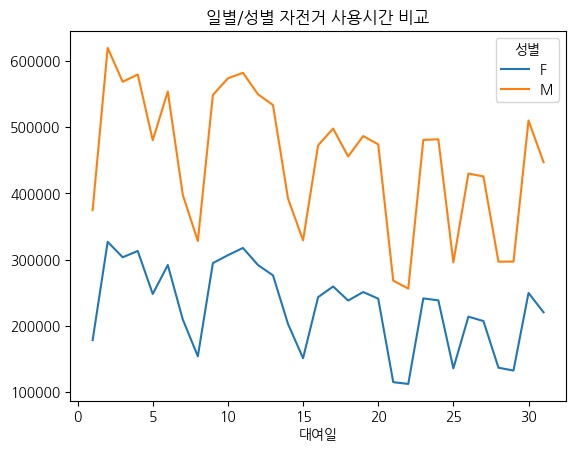

In [197]:
bike_fm = bike_df2.pivot_table(values="대여시간", columns="성별", index="대여일",aggfunc=sum)
g = bike_fm.plot(title="일별/성별 자전거 사용시간 비교", rot=0)

In [198]:
# 구별 거치대 개수
# 총거치대수 = 거치대수lcd + 거치대수qr 

bike_df1["총거치대수"] = bike_df1["거치대수lcd"] + bike_df1["거치대수qr"]
bike_df1.head(1)

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR,40.0


In [199]:
bike_df1

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR,40.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR,24.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR,16.0
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR,32.0
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR,22.0
...,...,...,...,...,...,...,...,...
2761,4954,신명초등학교 건너편,강동구,2024-07-22 00:00:00,0.0,15.0,QR,15.0
2762,4956,암사역사공원역 1번출구,강동구,2024-11-18 00:00:00,0.0,5.0,QR,5.0
2763,4957,신명초교 교차로,강동구,2024-09-08 00:00:00,0.0,10.0,QR,10.0
2764,4958,고덕래미안힐스테이트 아파트 211동,강동구,2024-09-24 00:00:00,0.0,10.0,QR,10.0


In [200]:
# 자치구별로 총거치대수 합계 구하기

bike_sum = bike_df1.groupby("자치구")["총거치대수"].sum().reset_index()
bike_sum = bike_sum.set_index("자치구")
bike_sum

,총거치대수
자치구,
강남구,1950.0
강동구,1535.0
강북구,640.0
강서구,3073.0
관악구,959.0
광진구,1428.0
구로구,1384.0
금천구,901.0
노원구,1786.0


In [201]:
import json
import folium

geo_path = './resources/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [202]:
m = folium.Map(location=[37.5502,126.982], zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=bike_sum["총거치대수"],
    columns=["자치구","총거치대수"],
    fill_color="YlGnBu",
    key_on="properties.name",
    legend_name="Number of Parking lots(%)").add_to(m)

m